# ARIMA untuk Forecast Ayam Potong (14 hari ke depan)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
from pathlib import Path

## Load Data

In [2]:
# Path ke data
possible_paths = [
    Path("processed_for_model/ts_ayam_potong_clean.csv"),
    Path("notebooks/processed_for_model/ts_ayam_potong_clean.csv"),
]

file_path = None
for p in possible_paths:
    if p.exists():
        file_path = str(p)
        break

if file_path is None:
    raise FileNotFoundError("Tidak menemukan ts_ayam_potong_clean.csv")

# Load data
df = pd.read_csv(file_path, parse_dates=['date'])
df = df.set_index('date').sort_index()

print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

Data loaded successfully!
Shape: (366, 1)

First 5 rows:
            Ayam_Potong
date                   
2024-01-01        0.000
2024-01-02       23.120
2024-01-03       12.760
2024-01-04       37.040
2024-01-05       53.675


## Visualisasi Data

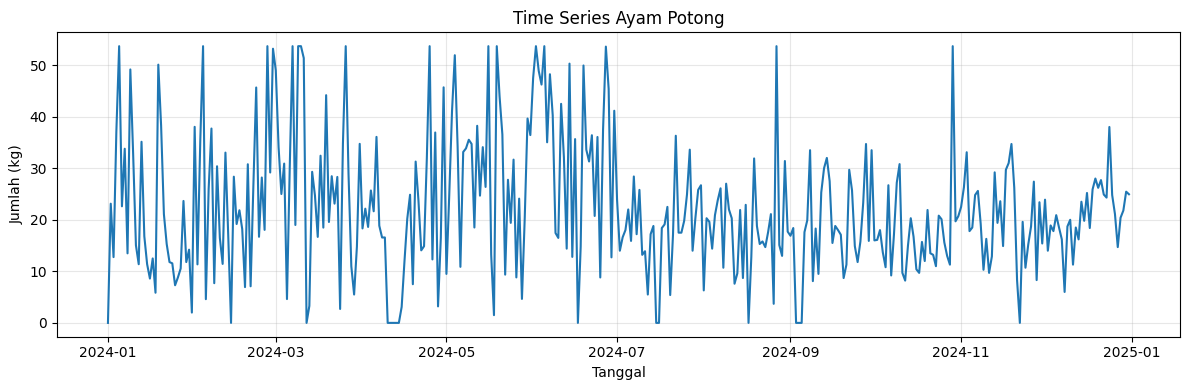

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(df['Ayam_Potong'])
plt.title('Time Series Ayam Potong')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah (kg)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Build Model ARIMA(1,1,1)

In [4]:
# Ambil series
series = df['Ayam_Potong']

# Build model ARIMA dengan parameter (1,1,1)
# Parameter ini SAMA dengan yang digunakan di arima_predictor.py
model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()

print("Model ARIMA(1,1,1) berhasil di-fit!")
print("\nRingkasan Model:")
print(model_fit.summary())

Model ARIMA(1,1,1) berhasil di-fit!

Ringkasan Model:
                               SARIMAX Results                                
Dep. Variable:            Ayam_Potong   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1440.513
Date:                Tue, 25 Nov 2025   AIC                           2887.025
Time:                        17:46:46   BIC                           2898.725
Sample:                    01-01-2024   HQIC                          2891.675
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1021      0.052      1.963      0.050       0.000       0.204
ma.L1         -0.9141      0.023    -40.514      0.000      -0.958      -0.87

c:\Users\aidil\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\aidil\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\aidil\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Forecast 14 Hari

In [5]:
# Forecast 14 hari
n_forecast = 14
forecast_values = model_fit.forecast(steps=n_forecast)

start_date = datetime(2025, 1, 2)

# Generate tanggal untuk 14 hari
prediction_dates = []
current_date = start_date
days_added = 0

while days_added < n_forecast:
    if current_date.month == 1 and current_date.day == 1:
        current_date += timedelta(days=1)
        continue
    
    prediction_dates.append(current_date)
    days_added += 1
    current_date += timedelta(days=1)

# Buat Series forecast
forecast_series = pd.Series(
    forecast_values.values,
    index=prediction_dates,
    name='Forecast_Ayam_Potong'
)

print(f"\nForecast untuk {len(forecast_series)} hari:")
print(f"Periode: {forecast_series.index[0].strftime('%Y-%m-%d')} - {forecast_series.index[-1].strftime('%Y-%m-%d')}")
print(f"\nRata-rata prediksi: {forecast_series.mean():.2f} kg/hari")
print(f"\nDetail prediksi:")
for date, value in forecast_series.items():
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f} kg")


Forecast untuk 14 hari:
Periode: 2025-01-02 - 2025-01-15

Rata-rata prediksi: 22.67 kg/hari

Detail prediksi:
2025-01-02: 22.88 kg
2025-01-03: 22.67 kg
2025-01-04: 22.65 kg
2025-01-05: 22.65 kg
2025-01-06: 22.65 kg
2025-01-07: 22.65 kg
2025-01-08: 22.65 kg
2025-01-09: 22.65 kg
2025-01-10: 22.65 kg
2025-01-11: 22.65 kg
2025-01-12: 22.65 kg
2025-01-13: 22.65 kg
2025-01-14: 22.65 kg
2025-01-15: 22.65 kg


## Visualisasi Historis + Forecast

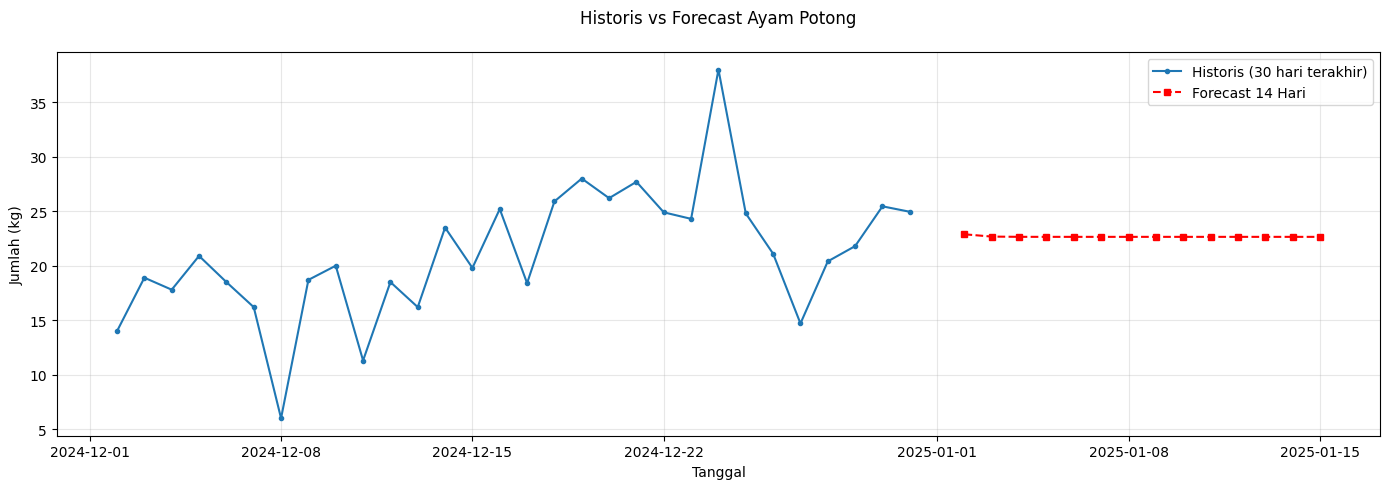

In [6]:
plt.figure(figsize=(14, 5))

# Plot data historis (30 hari terakhir untuk clarity)
plt.plot(df['Ayam_Potong'].tail(30), label='Historis (30 hari terakhir)', marker='o', markersize=3)

# Plot forecast
plt.plot(forecast_series, label='Forecast 14 Hari', 
         linestyle='--', marker='s', markersize=4, color='red')

plt.title('Historis vs Forecast Ayam Potong\n')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah (kg)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Simpan Hasil Forecast

In [7]:
# Simpan ke CSV
output_forecast = forecast_series.reset_index()
output_forecast.columns = ['date', 'Forecast_Ayam_Potong']

output_path = "forecast_ayam_potong_14hari_updated.csv"
output_forecast.to_csv(output_path, index=False)

print(f"\nForecast berhasil disimpan ke: {output_path}")
print(f"\nCatatan Penting:")
print(f"- Periode: 2 Januari - 15 Januari 2025")
print(f"- Model: ARIMA(1,1,1)")
print(f"- Konsisten dengan arima_predictor.py")


Forecast berhasil disimpan ke: forecast_ayam_potong_14hari_updated.csv

Catatan Penting:
- Periode: 2 Januari - 15 Januari 2025
- Model: ARIMA(1,1,1)
- Konsisten dengan arima_predictor.py
